# Linear Regression Concept

In [1]:
import pandas as pd
import statsmodels.formula.api as sma

Input = [10, 20, 30, 40]
Output = [8, 15, 18.5, 26.5]

df = pd.DataFrame([Input, Output], index=["Input", "Output"]).T
linear_model = sma.ols(formula ="Output ~ Input" , data = df).fit()

linear_model.params

Intercept    2.25
Input        0.59
dtype: float64

In [3]:
linear_model.summary()

2023-09-08 18:23:39,171 [9356] WARNING  py.warnings:110: [JupyterRequire] D:\ProgramData\Anaconda3\envs\PyEnv37\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     100.9
Date:                Fri, 08 Sep 2023   Prob (F-statistic):            0.00977
Time:                        18:23:39   Log-Likelihood:                -5.3799
No. Observations:                   4   AIC:                             14.76
Df Residuals:                       2   BIC:                             13.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2500      1.609      1.399      0.297      -4.671       9.171
Input          0.5900      0.059     10.045      0.010       0.337       0.843
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.299
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.472
Skew:                          -0.599   Prob(JB):                        0.790
Kurtosis:                       1.819   Cond. No.                         67.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression
### Data File: inc_exp_data.csv
#### The file contains data about Households, their Income & Expenses

## Attributes
#### 1: Mthly_HH_Income: Monthly Household Income
#### 2: Mthly_HH_Expense: Monthly Household Expense
#### 3: No_of_Fly_Members: No of Family Members
#### 4: Emi_or_Rent_Amt: Monthly EMI or Rent Expense 
#### 5: Annual_HH_Income: Annual Household Income
#### 6: Highest_Qualified_Member: Qualification of Highest Qualified Member in the Family
#### 7: No_of_Earning_Members: Number of Earning Members in the Household

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [5]:
## Set the working directory and import data

inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head()

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0             64200           Under-Graduate                      1  
1             79920               Illiterate                      1  
2            112800           Under-Graduate                      1  
3             97200               Illiterate                      1  
4            147000                 Graduate                      1

## Simple Linear Regression
## Linear Regression between Expense ~ Income

### Step 1: Scatter Plot to visually see the trend

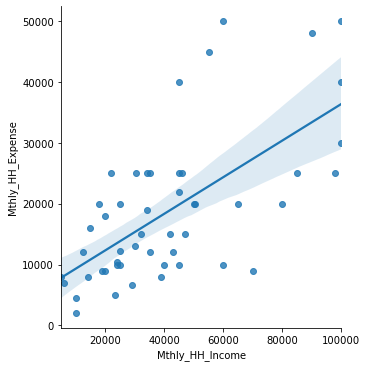

In [6]:
## Scatter Plot

sns.lmplot(x ="Mthly_HH_Income", 
           y = "Mthly_HH_Expense", data = inc_exp)  

In [7]:

cor = np.corrcoef(inc_exp['Mthly_HH_Income'], 
     inc_exp['Mthly_HH_Expense'])
cor[1,0] 

0.6492152549316462

In [8]:
## Simple Linear Regression Model
## OLS - Ordinary Least Square
import statsmodels.formula.api as sma
#import statsmodels.api as sm
linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income" , 
                    data = inc_exp).fit()

# fit
# predict
# fit_predict

In [9]:
#Get the model summary
linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.97
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           3.40e-07
Time:                        18:23:50   Log-Likelihood:                -526.77
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      48   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6319.1018   2488.733      2.539      0.014    1315.168    1.13e+04
Mthly_HH_Income     0.3008      0.051      5.914      0.000       0.198       0.403
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.471
Skew:                           0.774   Prob(JB):                       0.0649
Kurtosis:                       3.479   Cond. No.                     9.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
0.6492152549316462*0.6492152549316462

0.4214804472359624

# R Squared Calculation

In [11]:
# R-Squared Calculation Code

y = inc_exp['Mthly_HH_Expense']
x = inc_exp['Mthly_HH_Income']
ybar = inc_exp['Mthly_HH_Expense'].mean()
yhat = linear_mod.predict(x)
SST = sum((y-ybar)**2)
SSE = sum((y-yhat)**2)
SSR = SST - SSE
RSquared = SSR / SST
RSquared

0.42148044723596234

## Multiple Linear Regression

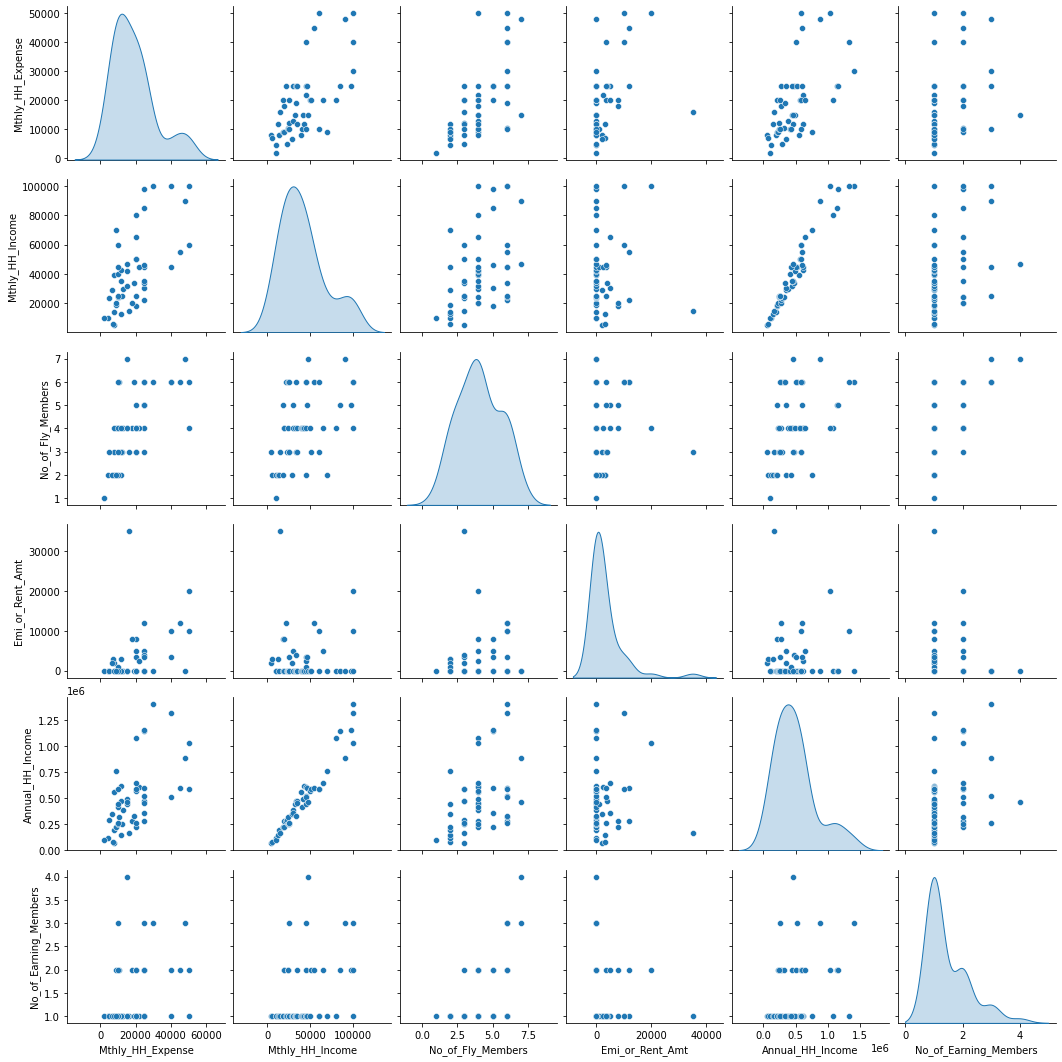

In [12]:
sns.pairplot(inc_exp[['Mthly_HH_Expense', 'Mthly_HH_Income', 'No_of_Fly_Members', 
                      'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members' ]], 
             diag_kind = 'kde')

In [13]:
inc_exp

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   
12            23400              5000                  3                0   
13            24000             10500                  6                0   
14            24000             10000                  4                0   
15            25000             12300                  3                0   
16            25000             20000                  3             3500   
17            25000             10000                  6                0   
18            29000              6600                  2             2000   
19            30000             13000                  4                0   
20            30500             25000                  5             5000   
21            32000             15000                  4                0   
22            34000             19000                  6                0   
23            34000             25000                  3             4000   
24            35000             12000                  3                0   
25            35000             25000                  4                0   
26            39000              8000                  4                0   
27            40000             10000                  4                0   
28            42000             15000                  4                0   
29            43000             12000                  4                0   
30            45000             25000                  6                0   
31            45000             40000                  6             3500   
32            45000             10000                  2             1000   
33            45000             22000                  4             2500   
34            46000             25000                  5             3500   
35            47000             15000                  7                0   
36            50000             20000                  4                0   
37            50500             20000                  3                0   
38            55000             45000                  6            12000   
39            60000             10000                  3                0   
40            60000             50000                  6            10000   
41            65000             20000                  4             5000   
42            70000              9000                  2                0   
43            80000             20000                  4                0   
44            85000             25000                  5                0   
45            90000             48000                  7                0   
46            98000             25000                  5                0   
47           100000             30000                  6                0   
48           100000             50000                  4            20000   
49           100000             40000                  6            10000   

    Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0    

In [14]:
## Correlation check 
inc_exp.corr()
inc_exp["Mthly_HH_Income"].corr(inc_exp["Annual_HH_Income"]).round(2)

0.97

<AxesSubplot:>

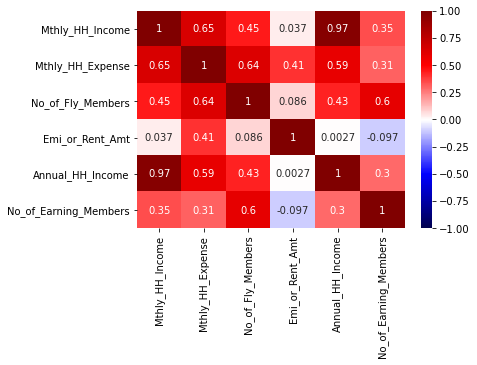

In [15]:
## Correlation Output
sns.heatmap(inc_exp.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [16]:
0.97 * 0.97

0.9409

### Multiple Linear Regression - Adjusted R-Squared 

In [17]:
## Multiple Linear Regression
m_linear_mod = sma.ols(
    formula = "Mthly_HH_Expense ~ Mthly_HH_Income + No_of_Fly_Members ",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     31.61
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           2.00e-09
Time:                        18:24:03   Log-Likelihood:                -519.14
No. Observations:                  50   AIC:                             1044.
Df Residuals:                      47   BIC:                             1050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4030.2745   3324.071     -1.212      0.231   -1.07e+04    2656.894
Mthly_HH_Income       0.2101      0.049      4.257      0.000       0.111       0.309
No_of_Fly_Members  3476.7390    849.017      4.095      0.000    1768.738    5184.740
==============================================================================
Omnibus:                        3.943   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.133
Skew:                           0.604   Prob(JB):                        0.209
Kurtosis:                       3.209   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~  Mthly_HH_Income  + \
                      No_of_Fly_Members+ Emi_or_Rent_Amt ",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.17e-12
Time:                        18:24:03   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
m_linear_mod.rsquared_adj.round(2)

0.68

In [20]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt ",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.17e-12
Time:                        18:24:03   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
inc_exp.head()

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0             64200           Under-Graduate                      1  
1             79920               Illiterate                      1  
2            112800           Under-Graduate                      1  
3             97200               Illiterate                      1  
4            147000                 Graduate                      1

In [22]:
inc_exp['Sr_No'] = np.arange(1,51)
inc_exp.head()

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  Sr_No  
0             64200           Under-Graduate                      1      1  
1             79920               Illiterate                      1      2  
2            112800           Under-Graduate                      1      3  
3             97200               Illiterate                      1      4  
4            147000                 Graduate                      1      5

In [23]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt\
                      ", data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.17e-12
Time:                        18:24:04   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
0.4092 + 12 * (-0.0167)

0.2104

0.2104

In [25]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt+ \
                      Sr_No", data = inc_exp).fit()

print("The model R-Squared is", m_linear_mod.rsquared.round(4))
print("The model Adj. R-Squared is", m_linear_mod.rsquared_adj.round(4))

# Earlier R Squared was 0.698
# Earlier Adj. R Squared was 0.678

The model R-Squared is 0.7022
The model Adj. R-Squared is 0.6757


In [26]:
m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     26.53
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           2.45e-11
Time:                        18:24:04   Log-Likelihood:                -510.17
No. Observations:                  50   AIC:                             1030.
Df Residuals:                      45   BIC:                             1040.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5532.9739   2889.283     -1.915      0.062   -1.14e+04     286.341
Mthly_HH_Income       0.1195      0.119      1.004      0.321      -0.120       0.359
No_of_Fly_Members  3127.4765    738.572      4.234      0.000    1639.917    4615.036
Emi_or_Rent_Amt       0.7123      0.162      4.407      0.000       0.387       1.038
Sr_No               176.8449    216.132      0.818      0.418    -258.468     612.158
==============================================================================
Omnibus:                        0.389   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.165
Skew:                           0.141   Prob(JB):                        0.921
Kurtosis:                       3.005   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Understanding Beta Coefficients
#### Sign of the Beta Coefficients
#### p-Value of Attributes

In [27]:
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt" ,data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.17e-12
Time:                        18:24:04   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
import statsmodels.formula.api as sma
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members + Emi_or_Rent_Amt  ",
                    data = inc_exp).fit()
#                       data = inc_exp.drop([5, 18, 28], axis = 0)).fit()

m_linear_mod.params

Intercept           -5148.070385
Mthly_HH_Income         0.210439
No_of_Fly_Members    3232.573874
Emi_or_Rent_Amt         0.685093
dtype: float64

### Variable Transformation

In [29]:
# Age 21, 23, 25, 26, 30, 33,32,33, 25, 34, 39, 40,32,34, 45, 50
## AGE_BKT <25, 25-30, 30-40, >40  - Binning / Bucketing 
## AGE_Log = log(Age)  -- Logarithmic Transformation
## Age_sq = Age * Age - Square Transformation
## Age_sqrt = sqrt(Age) -- Square root transformation
## Age_cube = Age * Age * Age -- Cube trasformation


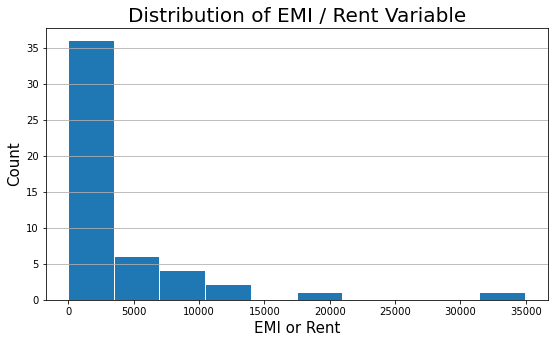

In [30]:
plt.figure(figsize=(9,5))
plt.hist(inc_exp['Emi_or_Rent_Amt'], rwidth = 0.98)

plt.title("Distribution of EMI / Rent Variable", fontsize=20)
plt.xlabel('EMI or Rent', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')

2023-09-08 18:24:08,127 [9356] WARNING  py.warnings:110: [JupyterRequire] D:\ProgramData\Anaconda3\envs\PyEnv37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



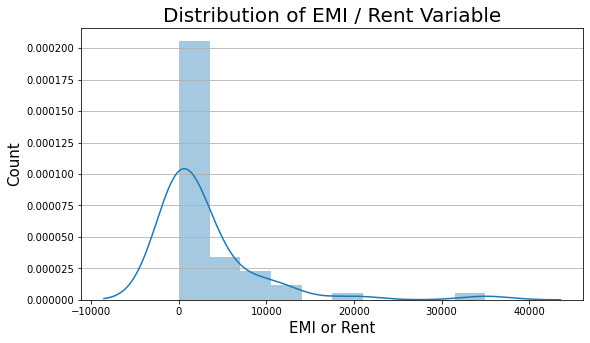

In [31]:
plt.figure(figsize=(9,5))
sns.distplot(inc_exp['Emi_or_Rent_Amt'],            
             hist = True, bins=10, 
             kde=True, color='#1F78B4')

plt.title("Distribution of EMI / Rent Variable", fontsize=20)
plt.xlabel('EMI or Rent', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')

In [32]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt ",
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.17e-12
Time:                        18:24:08   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

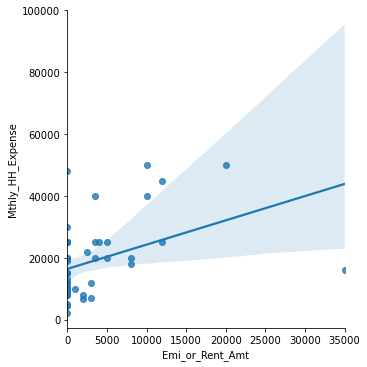

In [33]:
sns.lmplot(x ="Emi_or_Rent_Amt", 
           y = "Mthly_HH_Expense", data = inc_exp)

(array([36.,  6.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <BarContainer object of 10 artists>)

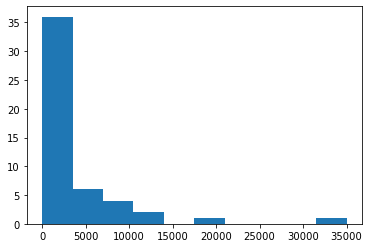

In [34]:
plt.hist(inc_exp['Emi_or_Rent_Amt'])

In [35]:
np.log(2001)

7.601402334583733

In [36]:
#Log Transformation Step
import numpy as np
inc_exp['Ln_Emi_or_Rent_Amt'] = np.log(inc_exp['Emi_or_Rent_Amt']+ 1 )

In [37]:
inc_exp.head()

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  Sr_No  \
0             64200           Under-Graduate                      1      1   
1             79920               Illiterate                      1      2   
2            112800           Under-Graduate                      1      3   
3             97200               Illiterate                      1      4   
4            147000                 Graduate                      1      5   

   Ln_Emi_or_Rent_Amt  
0            7.601402  
1            8.006701  
2            0.000000  
3            0.000000  
4            8.006701

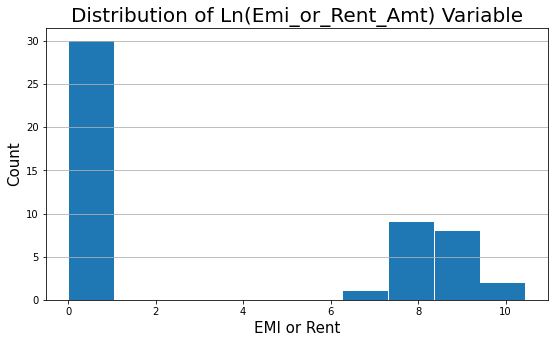

In [38]:
plt.figure(figsize=(9,5))
plt.hist(inc_exp['Ln_Emi_or_Rent_Amt'], rwidth = 0.98)

plt.title("Distribution of Ln(Emi_or_Rent_Amt) Variable", fontsize=20)
plt.xlabel('EMI or Rent', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')

(array([30.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  8.,  2.]),
 array([ 0.        ,  1.04631319,  2.09262638,  3.13893957,  4.18525276,
         5.23156596,  6.27787915,  7.32419234,  8.37050553,  9.41681872,
        10.46313191]),
 <BarContainer object of 10 artists>)

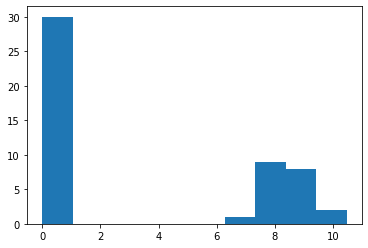

In [39]:
import numpy as np
inc_exp['Ln_Emi_or_Rent_Amt'] = np.log(inc_exp['Emi_or_Rent_Amt'] + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(inc_exp['Ln_Emi_or_Rent_Amt'])

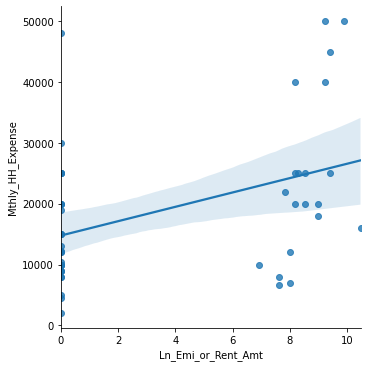

In [40]:
sns.lmplot(x ="Ln_Emi_or_Rent_Amt", 
           y = "Mthly_HH_Expense", data = inc_exp)

In [41]:
## Multiple Linear Regression Without Transformation
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members + Emi_or_Rent_Amt  ",
                      data = inc_exp).fit()

## Multiple Linear Regression With Transformation
m_linear_mod_2 = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members + Ln_Emi_or_Rent_Amt - 1 ",
                      data = inc_exp).fit()

print("Adj. R-Squared WITHOUT Variable Transformation", m_linear_mod.rsquared_adj.round(4))
print("Adj. R-Squared WITH Variable Transformation", m_linear_mod_2.rsquared_adj.round(4))

Adj. R-Squared WITHOUT Variable Transformation 0.6781
Adj. R-Squared WITH Variable Transformation 0.9114


In [42]:
0.7436/0.6781


1.0965934227989973

### Prediction using the Model

In [43]:
#prediction
inc_exp["pred_expenses"] = m_linear_mod_2.predict(inc_exp)

In [44]:
inc_exp.head()

Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  Sr_No  \
0             64200           Under-Graduate                      1      1   
1             79920               Illiterate                      1      2   
2            112800           Under-Graduate                      1      3   
3             97200               Illiterate                      1      4   
4            147000                 Graduate                      1      5   

   Ln_Emi_or_Rent_Amt  pred_expenses  
0            7.601402   14572.890723  
1            8.006701   13407.182321  
2            0.000000    5708.732933  
3            0.000000    3901.498652  
4            8.006701   14768.454163

### Thank you